# Question B1 (15 marks)

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [5]:
pip install pytorch_tabular[extra] --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

1.Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [7]:
df = pd.read_csv('hdb_price_prediction.csv')
#data cleaning with the requiremnts of the ques
train_df = df[df["year"] <= 2019]
val_df = df[df["year"] == 2020]
test_df = df[df["year"] == 2021]

In [8]:
train_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,ANG MO KIO,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,ANG MO KIO,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,ANG MO KIO,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,ANG MO KIO,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,ANG MO KIO,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64052,12,2019,YISHUN,326 YISHUN RING ROAD,Yishun,0.823163,14.421823,0.016807,0.000382,"EXECUTIVE, Apartment",67.583333,142.0,04 TO 06,580000.0
64053,12,2019,YISHUN,326 YISHUN RING ROAD,Yishun,0.823163,14.421823,0.016807,0.000382,"EXECUTIVE, Maisonette",67.583333,146.0,07 TO 09,565000.0
64054,12,2019,YISHUN,608 YISHUN STREET 61,Khatib,0.445869,13.498243,0.016807,0.000968,"EXECUTIVE, Apartment",71.500000,164.0,01 TO 03,633000.0
64055,12,2019,YISHUN,604 YISHUN STREET 61,Khatib,0.552769,13.598257,0.016807,0.000968,"EXECUTIVE, Apartment",71.500000,164.0,10 TO 12,788888.0


In [9]:
val_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
64057,1,2020,ANG MO KIO,208 ANG MO KIO AVENUE 1,Ang Mo Kio,0.917344,7.336493,0.016807,0.006243,"3 ROOM, New Generation",55.583333,73.0,04 TO 06,265000.0
64058,1,2020,ANG MO KIO,307C ANG MO KIO AVENUE 1,Ang Mo Kio,0.696776,7.341622,0.016807,0.006243,"3 ROOM, Model A",91.666667,70.0,19 TO 21,470000.0
64059,1,2020,ANG MO KIO,319 ANG MO KIO AVENUE 1,Ang Mo Kio,0.597608,7.292217,0.016807,0.006243,"3 ROOM, New Generation",56.333333,73.0,01 TO 03,230000.0
64060,1,2020,ANG MO KIO,216 ANG MO KIO AVENUE 1,Ang Mo Kio,0.994153,7.427003,0.016807,0.006243,"3 ROOM, New Generation",55.250000,73.0,04 TO 06,280000.0
64061,1,2020,ANG MO KIO,556 ANG MO KIO AVENUE 10,Ang Mo Kio,0.921541,8.163605,0.016807,0.006243,"3 ROOM, New Generation",59.083333,68.0,07 TO 09,220000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,12,2020,YISHUN,352 YISHUN RING ROAD,Yishun,1.153544,14.075870,0.016807,0.000382,"EXECUTIVE, Maisonette",66.666667,146.0,04 TO 06,560000.0
87366,12,2020,YISHUN,356 YISHUN RING ROAD,Yishun,1.254784,13.948192,0.016807,0.000382,"EXECUTIVE, Apartment",66.750000,145.0,01 TO 03,540000.0
87367,12,2020,YISHUN,611 YISHUN STREET 61,Khatib,0.466763,13.426086,0.016807,0.000968,"EXECUTIVE, Apartment",66.000000,142.0,13 TO 15,638000.0
87368,12,2020,YISHUN,834 YISHUN STREET 81,Khatib,0.281375,12.884815,0.016807,0.000968,"EXECUTIVE, Maisonette",66.166667,146.0,10 TO 12,683500.0


In [10]:
test_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
87370,1,2021,ANG MO KIO,170 ANG MO KIO AVENUE 4,Yio Chu Kang,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,01 TO 03,211000.0
87371,1,2021,ANG MO KIO,170 ANG MO KIO AVENUE 4,Yio Chu Kang,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,07 TO 09,225000.0
87372,1,2021,ANG MO KIO,331 ANG MO KIO AVENUE 1,Ang Mo Kio,0.884872,6.981730,0.016807,0.006243,"3 ROOM, New Generation",59.000000,68.0,04 TO 06,260000.0
87373,1,2021,ANG MO KIO,534 ANG MO KIO AVENUE 10,Ang Mo Kio,0.677246,8.333056,0.016807,0.006243,"3 ROOM, New Generation",58.166667,68.0,04 TO 06,265000.0
87374,1,2021,ANG MO KIO,561 ANG MO KIO AVENUE 10,Ang Mo Kio,0.922047,8.009223,0.016807,0.006243,"3 ROOM, New Generation",58.083333,68.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116422,12,2021,YISHUN,502B YISHUN STREET 51,Khatib,0.954699,13.018048,0.016807,0.000968,"5 ROOM, Improved",95.083333,112.0,13 TO 15,720000.0
116423,12,2021,YISHUN,877 YISHUN STREET 81,Khatib,0.475885,12.738721,0.016807,0.000968,"EXECUTIVE, Apartment",65.083333,142.0,01 TO 03,738000.0
116424,12,2021,YISHUN,824 YISHUN STREET 81,Khatib,0.408137,12.745325,0.016807,0.000968,"EXECUTIVE, Maisonette",65.000000,146.0,04 TO 06,755000.0
116425,12,2021,YISHUN,348A YISHUN AVENUE 11,Yishun,0.733238,14.183095,0.016807,0.000382,"5 ROOM, DBSS",90.916667,112.0,10 TO 12,848000.0


2.Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [11]:
# Define the configuration for data preprocessing
data_config = DataConfig(
    target=["resale_price"],
    continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", 
                     "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"]
)

# Configure the training settings
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Automatically find the optimal learning rate
    batch_size=1024,    # Set batch size
    max_epochs=50       # Set maximum number of epochs
)

# Configure the model architecture settings
model_config = CategoryEmbeddingModelConfig(
    task="regression",  # Define the task type
    layers=50           # Specify the number of layers
)

# Define optimizer configuration settings
optimizer_config = OptimizerConfig(
    optimizer="Adam"    # Set optimizer to Adam
)

# Initialize and configure the TabularModel with the defined configurations
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

# Fit the model using training and validation data
tabular_model.fit(train=train_df, validation=val_df)
# YOUR CODE HERE

2024-10-11 15:41:10,502 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-10-11 15:41:10,581 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-10-11 15:41:10,613 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

C:\Users\65976\AppData\Roaming\Python\Python312\site-packages\pytorch_tabular\categorical_encoders.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
C:\Users\65976\AppData\Roaming\Python\Python312\site-packages\pytorch_tabular\categorical_encoders.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inter

2024-10-11 15:41:10,743 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: CategoryEmbeddingModel

2024-10-11 15:41:10,809 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-10-11 15:41:10,867 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

C:\Users\65976\AppData\Roaming\Python\Python312\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory C:\Users\65976\Desktop\SC4001 Assignment\saved_models exists and is not empty.
C:\Users\65976\AppData\Roaming\Python\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
C:\Users\65976\AppData\Roaming\Python\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at c:\Users\65976\Desktop\SC4001 Assignment\.lr_find_f0f84ff3-6517-401e-a50e-b0f5f39fcd24.ckpt
Restored all states from the checkpoint at c:\Users\65976\Desktop\SC4001 Assignment\.lr_find_f0f84ff3-6517-401e-a50e-b0f5f39fcd24.ckpt


2024-10-11 15:41:14,268 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2024-10-11 15:41:14,270 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2024-10-11 15:41:28,769 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-10-11 15:41:28,771 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

3.Report the test RMSE error and the test R2 value that you obtained.



In [12]:
from sklearn.metrics import mean_squared_error, r2_score

pred_df = tabular_model.predict(test=test_df)

pred_df["resale_price"] = test_df["resale_price"].values # Append the testing set retail price (ground truths)

pred_df


C:\Users\65976\AppData\Roaming\Python\Python312\site-packages\pytorch_tabular\categorical_encoders.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
C:\Users\65976\AppData\Roaming\Python\Python312\site-packages\pytorch_tabular\categorical_encoders.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inter

,resale_price_prediction,resale_price
87370,136601.468750,211000.0
87371,166652.890625,225000.0
87372,299092.687500,260000.0
87373,294914.812500,265000.0
87374,266336.750000,265000.0
...,...,...
116422,574844.062500,720000.0
116423,574533.562500,738000.0
116424,636705.562500,755000.0
116425,691219.812500,848000.0


In [13]:
y = pred_df["resale_price"]
pred = pred_df["resale_price_prediction"]

rmse = np.sqrt(mean_squared_error(y, pred))
print("RMSE: ", rmse)

r_squared = r2_score(y, pred)
print("R-squared: ", r_squared)



RMSE:  80411.26920029311
R-squared:  0.755557857878187


4.Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [14]:
pred_df["Absolute_loss"] = abs(y-pred)
sorted_df = pred_df.sort_values("Absolute_loss", ascending=False)


top = sorted_df[0:25]
top

,resale_price_prediction,resale_price,Absolute_loss
92405,360914.62500,780000.0,419085.37500
105372,561211.68750,975000.0,413788.31250
106192,560444.87500,968000.0,407555.12500
105869,535871.50000,930000.0,394128.50000
106057,574577.00000,958000.0,383423.00000
105695,549269.43750,930000.0,380730.56250
105696,583298.37500,950000.0,366701.62500
92442,799521.93750,1165000.0,365478.06250
105702,869783.56250,1235000.0,365216.43750
105699,670265.93750,1032888.0,362622.06250


In [15]:
# Calculate the mean of the resale price and predicted price
mean_resale_price = pred_df["resale_price"].mean()
mean_prediction = pred_df["resale_price_prediction"].mean()

# Calculate the median of the resale price and predicted price
median_resale_price = pred_df["resale_price"].median()
median_prediction = pred_df["resale_price_prediction"].median()

# Print the results
print("Mean Resale Price: ", mean_resale_price)
print("Mean Prediction: ", mean_prediction)
print("Median Resale Price: ", median_resale_price)
print("Median Prediction: ", median_prediction)


Mean Resale Price:  511417.39377189666
Mean Prediction:  455211.62
Median Resale Price:  483000.0
Median Prediction:  441981.44


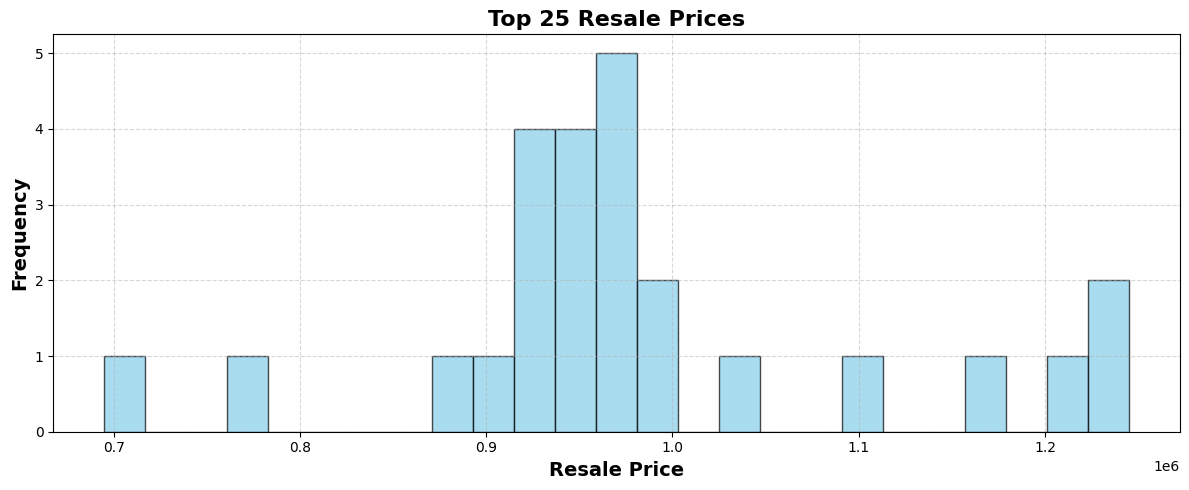

In [18]:
import matplotlib.pyplot as plt

# Create the figure and axis with custom appearance
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

# Customize histogram appearance
ax1.hist(top["resale_price"], bins=25, alpha=0.7, edgecolor='black', color='skyblue')

# Set labels and title with increased font sizes
ax1.set_xlabel('Resale Price', fontsize=14, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax1.set_title('Top 25 Resale Prices', fontsize=16, fontweight='bold')

# Add gridlines for better readability
ax1.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to make sure labels are not cut off
plt.tight_layout()

# Show the plot
plt.show()


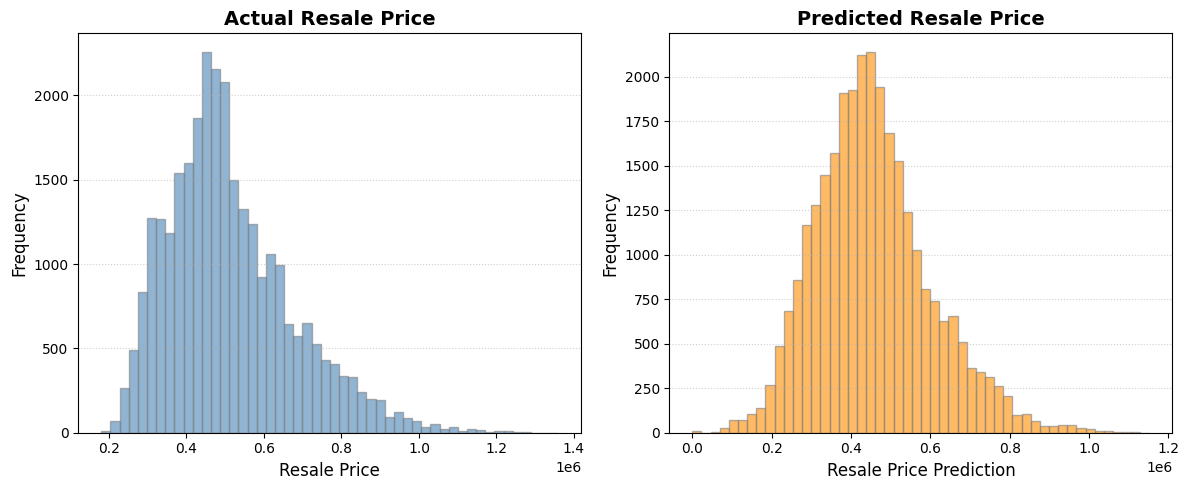

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Adjust the appearance of the first histogram
ax1.hist(pred_df["resale_price"], bins=50, alpha=0.6, edgecolor='gray', color='steelblue')
ax1.set_xlabel('Resale Price', fontsize=12, fontweight='medium')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='medium')
ax1.set_title('Actual Resale Price', fontsize=14, fontweight='semibold')
ax1.grid(axis='y', linestyle=':', alpha=0.6)

# Adjust the appearance of the second histogram
ax2.hist(pred_df["resale_price_prediction"], bins=50, alpha=0.6, edgecolor='gray', color='darkorange')
ax2.set_xlabel('Resale Price Prediction', fontsize=12, fontweight='medium')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='medium')
ax2.set_title('Predicted Resale Price', fontsize=14, fontweight='semibold')
ax2.grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()


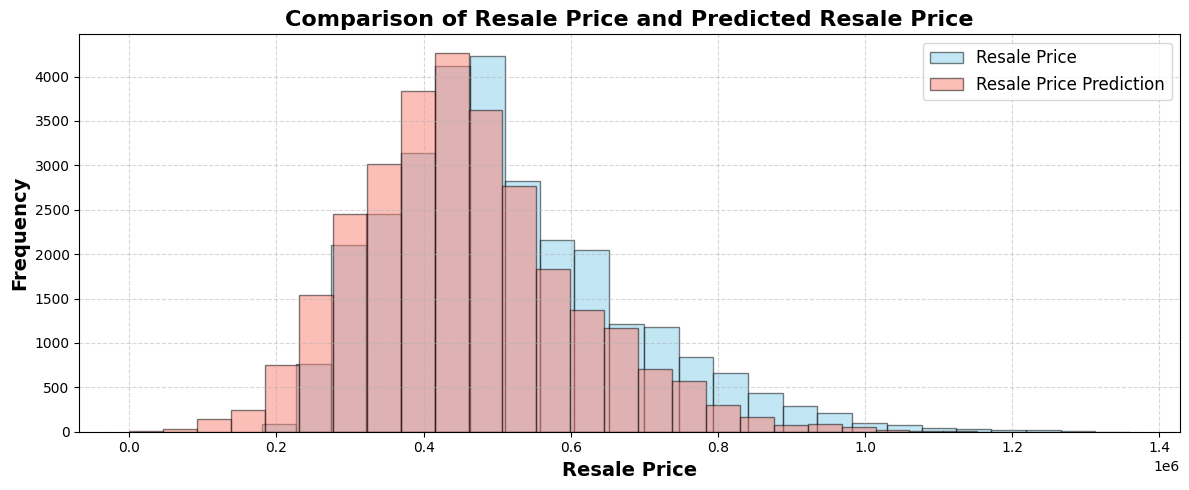

In [20]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Plot both histograms on the same axis for comparison
ax.hist(pred_df["resale_price"], bins=25, alpha=0.5, edgecolor='black', color='skyblue', label='Resale Price')
ax.hist(pred_df["resale_price_prediction"], bins=25, alpha=0.5, edgecolor='black', color='salmon', label='Resale Price Prediction')

# Set labels and title with larger font sizes
ax.set_xlabel('Resale Price', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Resale Price and Predicted Resale Price', fontsize=16, fontweight='bold')

# Add a legend to distinguish between the two histograms
ax.legend(fontsize=12)

# Add gridlines with a subtle dashed style
ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to ensure all elements are fully visible
plt.tight_layout()

# Display the plot
plt.show()


### Analysis of Resale Price and Predicted Resale Price Distributions

#### 1. Distribution Characteristics
- **Resale Price Distribution:**
  - The resale prices are right-skewed, indicating that a significant portion of the data points are concentrated in the lower price range, with fewer high-value resale prices.
- **Predicted Resale Price Distribution:**
  - The predicted resale prices follow a relatively uniform distribution, suggesting that the model is not capturing the extreme values in the higher resale price ranges (right tail).

#### 2. Model Performance for High Resale Prices
- The comparison shows that the model struggles with generalization in predicting high resale prices.
- The top 25 samples with the largest errors are above the mean and median of the resale prices, indicating that these high-value predictions are less accurate.

#### 3. Implications of Right-Skewed Data
- The right skewness in the resale price data suggests that the model might be overfitted to the more frequently occurring lower resale prices.
- This overfitting results in underperformance for high resale prices due to insufficient representation during training.

#### 4. Potential Improvements
- **Rebalancing the Training Data:**
  - Up-sampling high resale price data points or down-sampling low resale prices could improve the model's ability to generalize for high resale prices.
  - Utilizing Synthetic Minority Over-sampling Technique (SMOTE) to enhance the representation of high resale prices may also aid in better predictions for those values.
- **Log Transformation of Target Variable:**
  - Applying a log transformation can help in normalizing the target variable, potentially leading to a distribution closer to normal, which may assist the model in capturing both low and high resale prices effectively.
